In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [3]:
# Define directories
train_dir = r"D:\Desktop\DS\glasses-noglasses\train"
test_dir = r"D:\Desktop\DS\glasses-noglasses\validate"

In [4]:
# Image Data Generators
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create Image Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming you have 10 categories
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,397,122 (169.36 MB)

 Trainable params: 44,397,122 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback to save the best model
checkpoint = ModelCheckpoint('model_best.keras', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)

# Training parameters
epochs = 300

# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint]  # Include the checkpoint callback here
)


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8203 - loss: 0.3569
Epoch 1: val_loss improved from inf to 0.13604, saving model to model_best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.8229 - loss: 0.3521 - val_accuracy: 0.9500 - val_loss: 0.1360
Epoch 2/300
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.8500 - loss: 0.2100
Epoch 2: val_loss did not improve from 0.13604
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.8500 - loss: 0.2100 - val_accuracy: 0.9000 - val_loss: 0.1716
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8125 - loss: 0.3253
Epoch 3: val_loss improved from 0.13604 to 0.11711, saving model to model_best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step - accuracy: 0.8125 - loss: 0.3299 - val_accuracy: 0.9500 - val_loss: 0.1171
Epoch 4/300
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9500 - loss: 0.1269
Epoch 4: val_loss did not improve from 0.11711
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9500 - loss

In [19]:
# Evaluation on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 40 images belonging to 2 classes.


In [20]:
# Get the test data evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9062 - loss: 0.5567
Test loss: 0.5566611289978027
Test accuracy: 0.90625


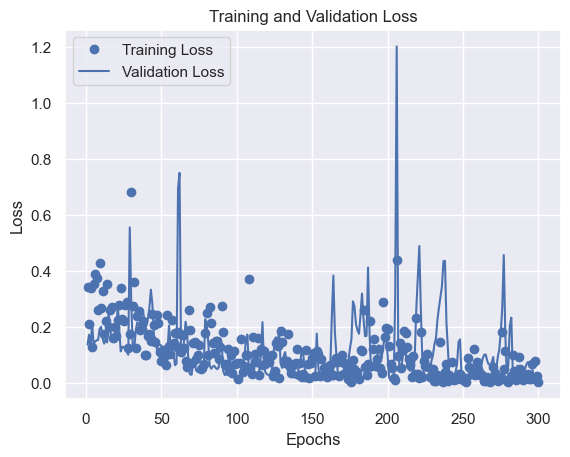

In [21]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


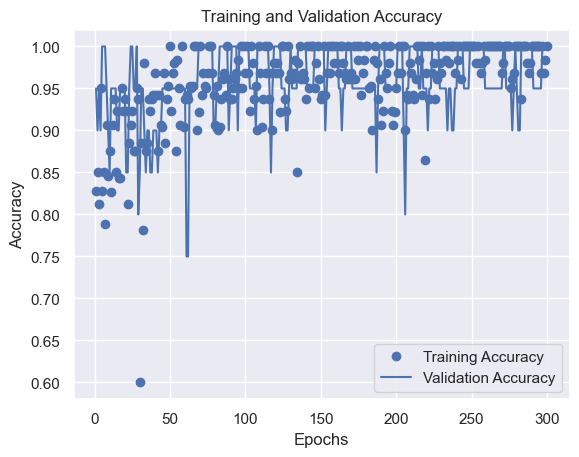

In [22]:
# Plotting Training and Validation Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
validation_pred_probs = model.predict(validation_generator, steps=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Validation labels length: 20
Predicted labels length: 20


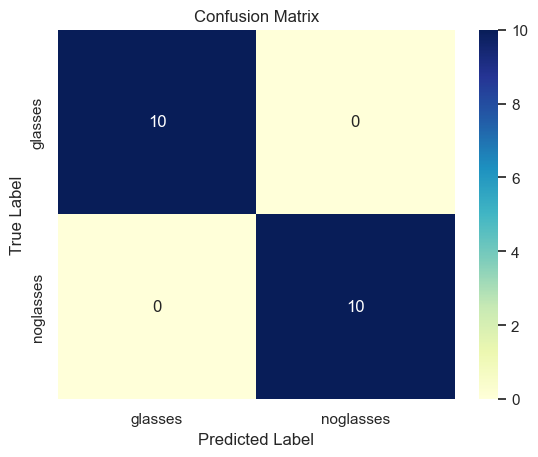

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator, steps=None)  # Let Keras handle steps automatically
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Ensure both arrays have the same length
print("Validation labels length:", len(validation_labels))
print("Predicted labels length:", len(validation_pred_labels))

# If there is still a mismatch, adjust the data or trim one of the arrays (if necessary)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)

# Class names
class_names = list(train_generator.class_indices.keys())

# Plot confusion matrix
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: glasses


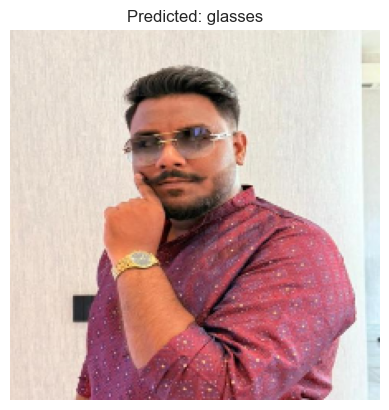

In [29]:
# Image Path
img_path =r"C:\Users\Shivam Patel\Pictures\Screenshots\Screenshot 2024-12-20 211601.png"

# Load the image with the same target size as model input
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add batch dimension (for model input)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Mapping class index to class name
class_names = list(train_generator.class_indices.keys())
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"Predicted class: {predicted_label}")

# Display the image with the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: glasses


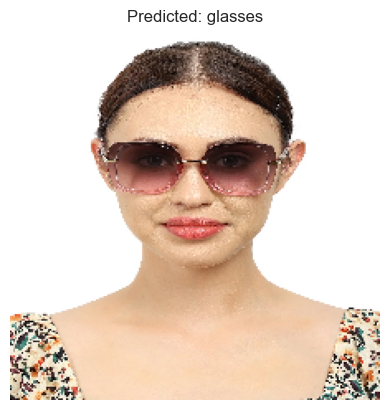

In [28]:
# Image Path
img_path =r"D:\Desktop\DS\Data\Unknown images\a3027_1.webp"

# Load the image with the same target size as model input
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add batch dimension (for model input)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Mapping class index to class name
class_names = list(train_generator.class_indices.keys())
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"Predicted class: {predicted_label}")

# Display the image with the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [31]:
model.save(r'D:\Desktop\IMARTICUS\CAPSTONE\saved_model.h5')
# Create directory if it doesn't exist
save_dir = r'D:\Desktop\IMARTICUS\CAPSTONE\glasses_or_noglasses_model'
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, 'saved_model.h5'))